## Quiñonez Tenorio Jair Andrés 
## Proyecto análisis de datos de un CSV
## Tema: Películas de IMDB entre 20606 y 2016

<ol> <strong>Preguntas/Items a presentar</strong>
    <li>Procentaje de directores</li>
    <li>Generos por año</li>
    <li>Generos combinados por años</li>
    <li>Votos por genero de las primeras 40</li>
    <li>Numero de peliculas por año</li>
    <li>Porcentaje de peliculas hechas en los 5 mejores generos</li>
    <li>Porcentaje de Recaudacion por genero</li>
    <li>Los 10 directores mas activos</li>
    <li>Peliculas con mayor duracion de las primera 15</li>
    <li>Años con mas tiempo en peliculas</li>
    <li>Top 10 Actores con mas peliculas</li>
    <li>Peliculas por Rating</li>
    <li>Actores por estatura</li>
    <li>Actores nacidos en mismo año</li>
    <li>Actores por año de nacimiento</li>
    <li>Actores por Años de muerte</li>
    <li>Principales profeciones</li>
    <li>Actores y matrimonios</li>
    <li>Top 40 Votos por titulo</li>
    <li>Meta Score por director</li>
</ol>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
path_csv = 'E:\EPN\Python\ReposPY\py-quinonez-jair\Proyectos_indivuales\Dataset_csv_Quinonez\data\IMDB-Movie-Data.csv'
columnas = ['Rank','Title', 'Genre','Director','Actors','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']
df_imdb = pd.read_csv(path_csv,usecols = columnas)

In [2]:
df_imdb.head()


,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [4]:
df_imdb['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Sci-Fi,Thriller             1
Fantasy,Horror,Thriller     1
Comedy,Sci-Fi               1
Adventure,Drama,History     1
Drama,Fantasy,Music         1
Name: Genre, Length: 207, dtype: int64

# Procentaje de directores

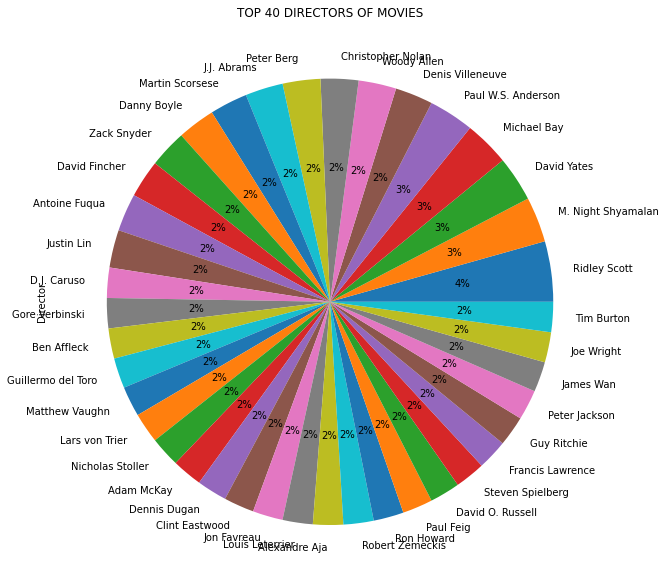

In [5]:
directores_40 = df_imdb['Director'].value_counts()[:40].plot.pie(autopct='%1i%%',figsize=(10,15))
plt.title('TOP 40 DIRECTORS OF MOVIES')
plt.show()


## Generos por año

The total number of movies with  Action = 303
The total number of movies with  Adventure = 259
The total number of movies with  Animation = 49
The total number of movies with  Biography = 81
The total number of movies with  Comedy = 279
The total number of movies with  Crime = 150
The total number of movies with  Drama = 513
The total number of movies with  Fantasy = 101
The total number of movies with  Family = 51
The total number of movies with  History = 29
The total number of movies with  Horror = 119
The total number of movies with  Music = 21
The total number of movies with  Musical = 5
The total number of movies with  Mystery = 106
The total number of movies with  Romance = 141
The total number of movies with  Sci-Fi = 120
The total number of movies with  Sport = 18
The total number of movies with  Thriller = 195
The total number of movies with  War = 13
The total number of movies with  Western = 7


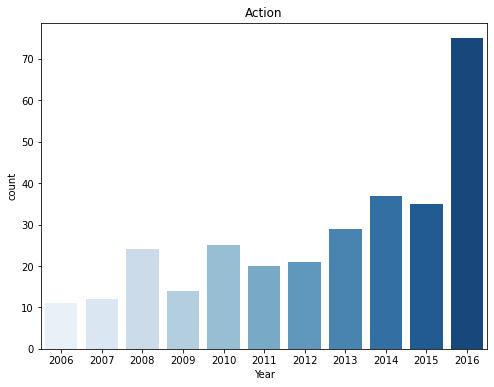

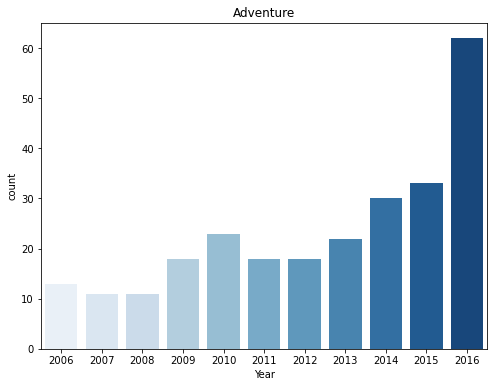

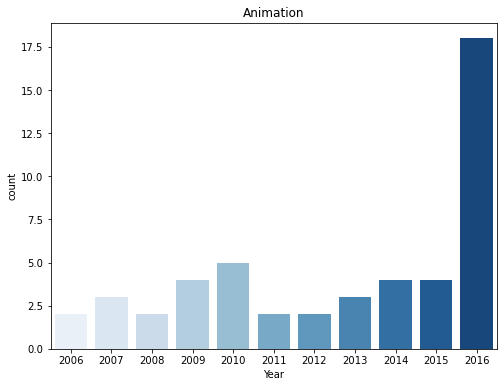

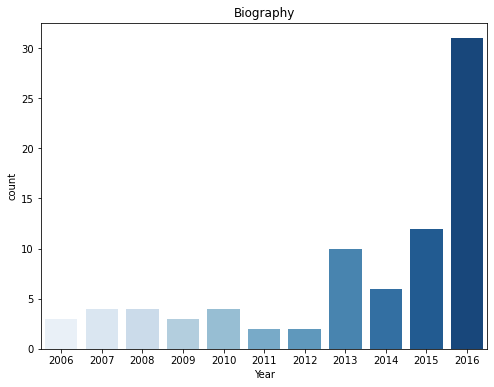

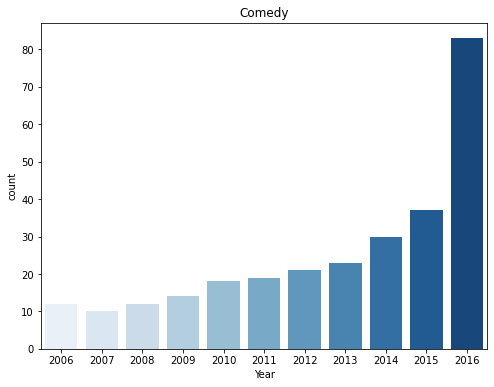

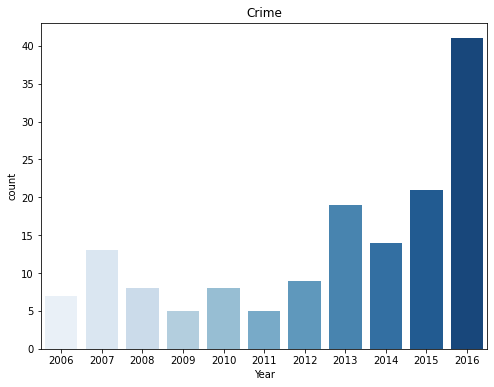

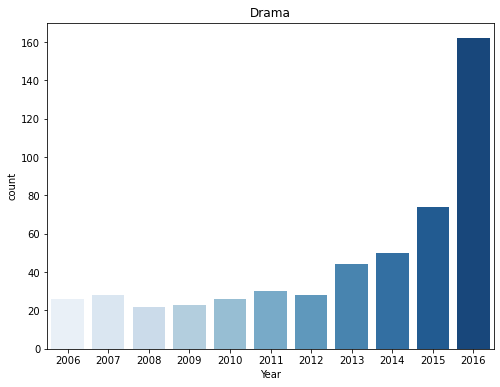

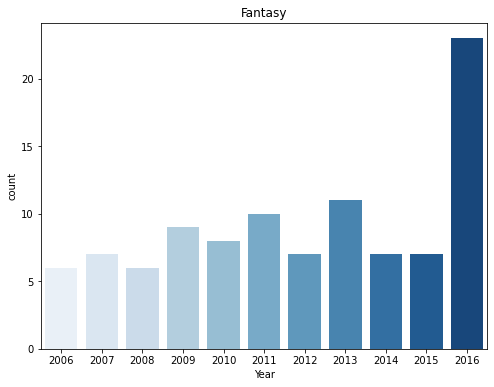

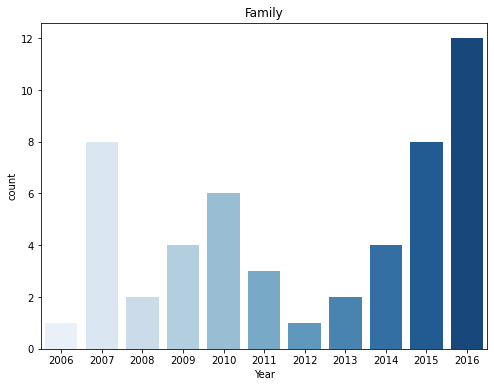

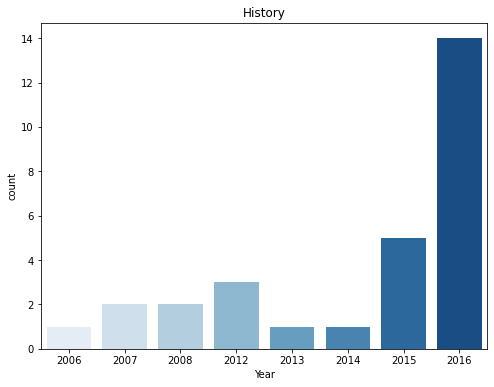

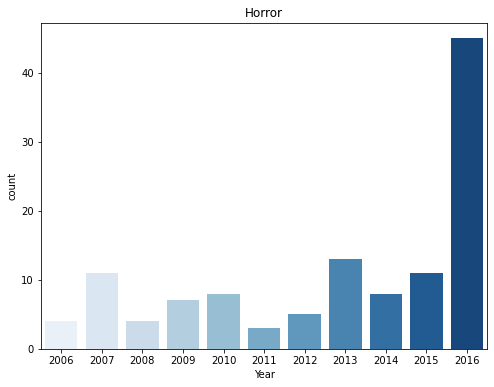

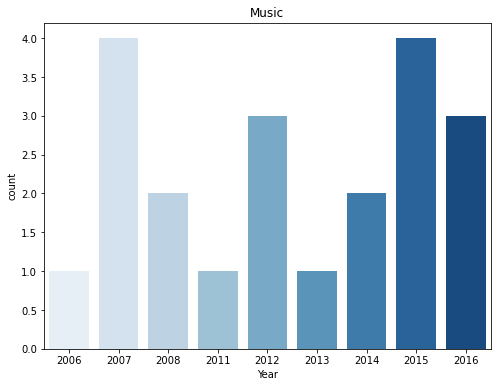

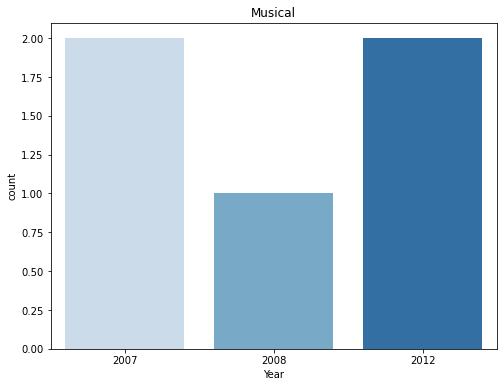

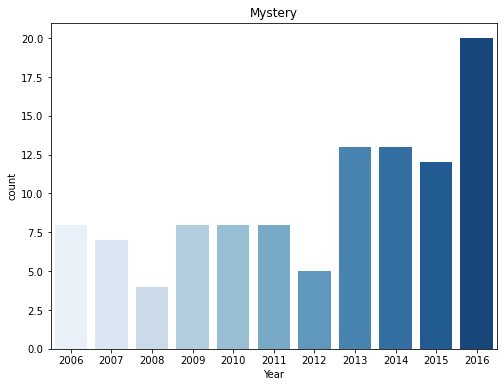

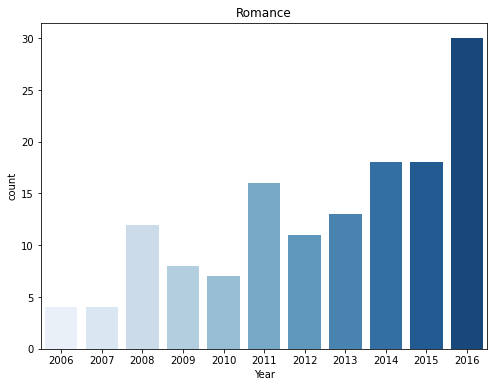

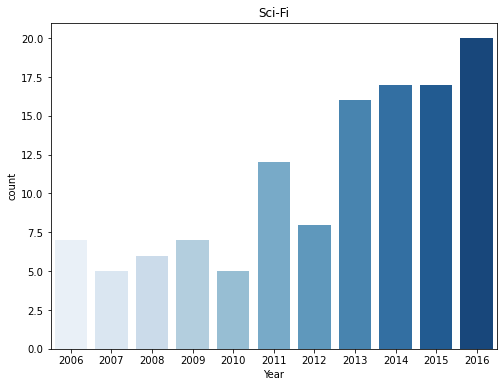

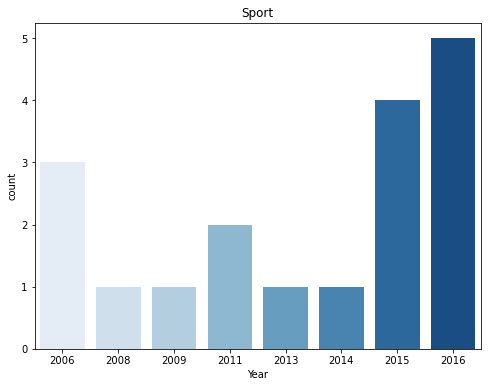

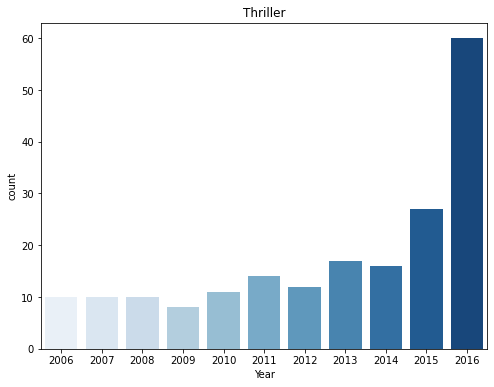

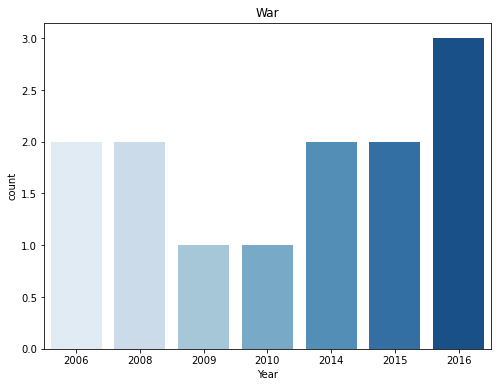

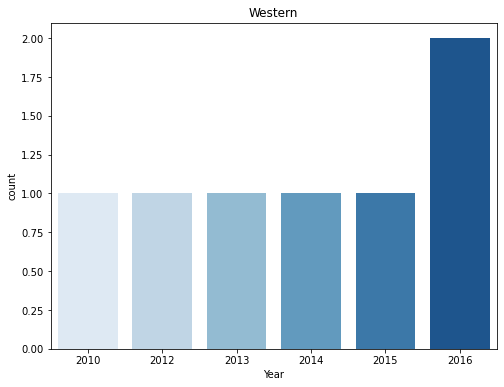

In [6]:
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
for genre in seperate_genre:
    df_genre = df_imdb['Genre'].str.contains(genre).fillna(False)
    print('The total number of movies with ',genre,'=',len(df_imdb[df_genre]))
    f, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x='Year', data=df_imdb[df_genre], palette="Blues");
    plt.title(genre)

### Generos combinados por años



Text(0.5, 1.0, 'GENERO')

<Figure size 3600x3600 with 0 Axes>

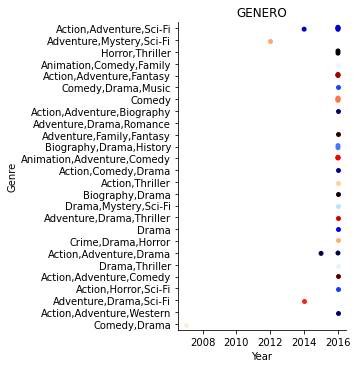

In [7]:
df_genre = df_imdb["Genre"].value_counts()
df_genre.sort_index(inplace=True)
plt.figure(figsize=(50,50))
sns.catplot(y="Genre",x='Year', data=df_imdb.iloc[:40], palette="flag");
plt.title('GENERO')

## Votos por genero de las primeras 40 


Genre
Action                          17237
Action,Adventure              1003377
Action,Adventure,Biography      97560
Action,Adventure,Comedy       2709033
Action,Adventure,Crime        1201937
                               ...   
Romance,Sci-Fi,Thriller        208632
Sci-Fi                           1453
Sci-Fi,Thriller                170897
Thriller                       305642
Thriller,War                     5926
Name: Votes, Length: 207, dtype: int64


<AxesSubplot:xlabel='Genre'>

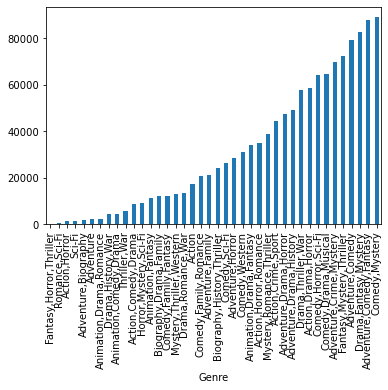

In [8]:
genero_directo = df_imdb[['Genre', 'Votes']]
#print(genero_directo)
genero_dir = genero_directo.groupby('Genre')['Votes'].sum()
print(genero_dir)
genero_dir = genero_dir.sort_values(axis=0, ascending=True)[:40]
genero_dir.plot(kind='bar')

## Numero de peliculas por año 

Text(0.5, 1.0, 'Peliculas por Año')

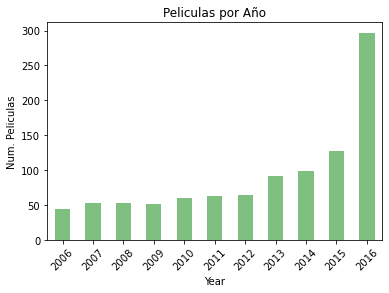

In [9]:
peli_anio = df_imdb['Year'].value_counts().sort_index().plot(kind='bar',color='g', alpha=0.5, grid=False, rot=45)
peli_anio.set_xlabel('Year')
peli_anio.set_ylabel('Num. Peliculas')
peli_anio.set_title('Peliculas por Año')



## Porcentaje de peliculas hechas en los 5 mejores generos


Text(0.5, 1.0, 'Peliculas de los 5 generos mas altos')

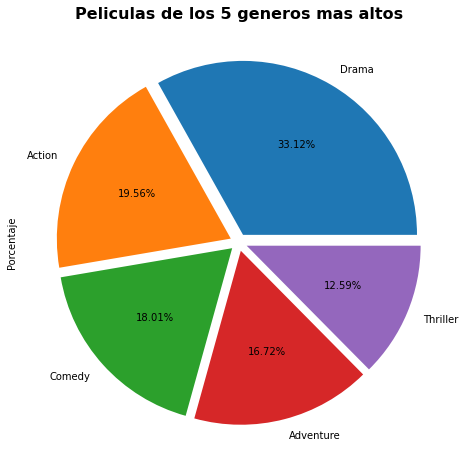

In [10]:
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'

genre_pcts = np.zeros(len(seperate_genre))
i = 0
for genre in seperate_genre:
    current_genre = df_imdb['Genre'].str.contains(genre).fillna(False)
    pct = len(df_imdb[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    #print(genre, pct)
genre_pcts_df = pd.DataFrame(genre_pcts, index=seperate_genre, columns=['Porcentaje'])
genre_pcts_df
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
#graficar
genre_pcts_df.sort_values(by='Porcentaje', ascending=False).head(5).plot.pie(legend=False,subplots=True,autopct='%.2f%%',figsize=(8,8), explode=explode)
plt.title('Peliculas de los 5 generos mas altos', weight='bold', fontsize=16)

## Porcentaje de Recaudacion por genero 

Action 49.22093462408949
Adventure 53.709850263955474
Animation 12.42432050890017
Biography 5.785510124974495
Comedy 26.70306157375741
Crime 11.107059142945145
Drama 30.31803772182683
Fantasy 16.951072438315926
Family 8.546840414078586
History 1.902210125914527
Horror 4.718947009288069
Music 1.5403530870928626
Musical 0.5643095271141182
Mystery 6.721035539293616
Romance 7.579547446458265
Sci-Fi 20.612663116294684
Sport 1.4386360909265343
Thriller 14.716090970771086
War 0.7386578222554245
Western 0.7729275196591113


Text(0.5, 1.0, 'Porcentage de recaudacion por genero')

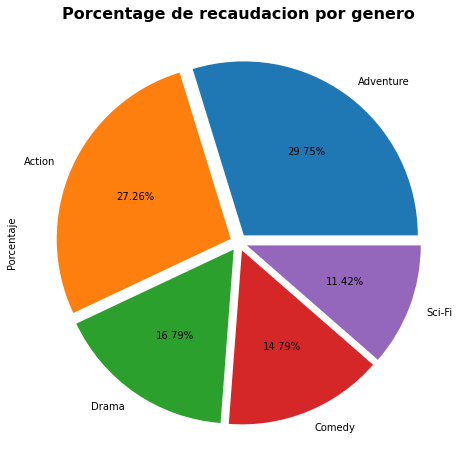

In [11]:

genre_recauda_pcts = np.zeros(len(seperate_genre))
i = 0
for genre in seperate_genre:
    current_genre = df_imdb['Genre'].str.contains(genre).fillna(False)
    recauda_pct = df_imdb[current_genre].xs('Revenue (Millions)', axis=1).sum() / df_imdb['Revenue (Millions)'].sum() * 100
    genre_recauda_pcts[i] = recauda_pct
    i += 1
    print(genre, recauda_pct)
#xs cruza un datafram y una serie
genre_recauda_pcts_df = pd.DataFrame(genre_recauda_pcts, index=seperate_genre, columns=['Porcentaje'])
genre_recauda_pcts_df
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
#graficar
genre_recauda_pcts_df.sort_values(by='Porcentaje', ascending=False).head(5).plot.pie(legend=False,subplots=True,autopct='%.2f%%',figsize=(8,8), explode=explode)
plt.title('Porcentage de recaudacion por genero', weight='bold', fontsize=16)

## Los 10 directores mas activos


In [12]:
mas_director = df_imdb['Director'].value_counts().head(10)
mas_director.index
director_revenue_totals = np.zeros(len(mas_director))
i = 0
for director in mas_director.index:
    actual_director = df_imdb['Director'].str.contains(director).fillna(False)
    director_film_revenue = df_imdb[actual_director].xs('Revenue (Millions)', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
    print(director, director_film_revenue)
director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=mas_director.index, columns=['Revenue (Millions)'])
director_revenue_totals_df

Ridley Scott 719.06
M. Night Shyamalan 370.48999999999995
David Yates 1630.51
Michael Bay 1421.32
Paul W.S. Anderson 208.92
Denis Villeneuve 216.21
Woody Allen 141.19000000000003
Christopher Nolan 1515.0900000000001
Peter Berg 511.33
J.J. Abrams 1683.4499999999998


,Revenue (Millions)
Ridley Scott,719.06
M. Night Shyamalan,370.49
David Yates,1630.51
Michael Bay,1421.32
Paul W.S. Anderson,208.92
Denis Villeneuve,216.21
Woody Allen,141.19
Christopher Nolan,1515.09
Peter Berg,511.33
J.J. Abrams,1683.45


Text(0.5, 1.0, 'Most Active Directors Revenue Contribution')

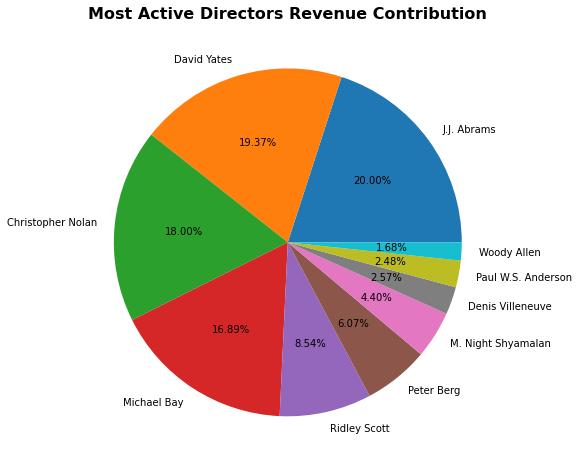

In [13]:
director_revenue_totals_df.sort_values(by='Revenue (Millions)', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=16)

## Peliculas con mayor duracion de las primera 15



Text(0.5, 1.0, 'Top 15')

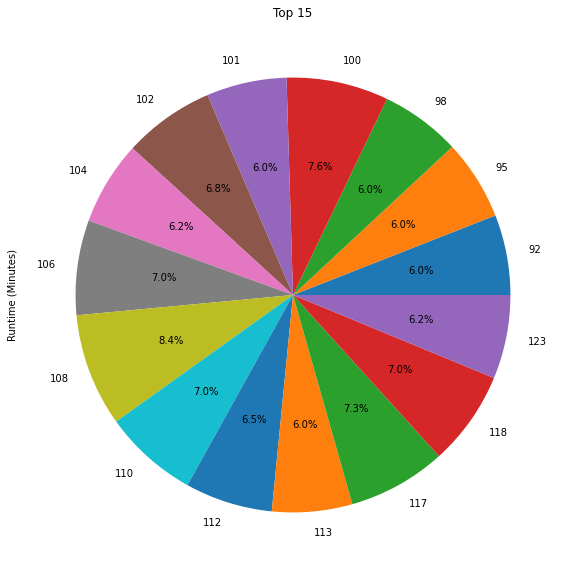

In [14]:
peli_anio = df_imdb['Runtime (Minutes)'].value_counts().head(15).sort_index().plot.pie(autopct='%1.1f%%',figsize=(10,10))
peli_anio.set_title('Top 15')


## Años con mas tiempo en peliculas 


Text(0.5, 1.0, 'Tiempo al año gastado en peliculas')

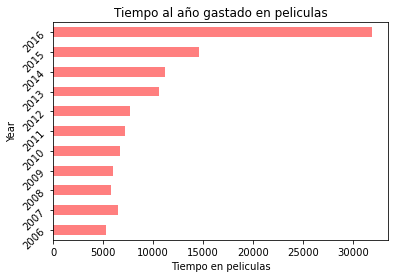

In [15]:
peli_anio = df_imdb[['Year','Runtime (Minutes)']].groupby('Year')['Runtime (Minutes)'].sum().plot(kind='barh',color='r', alpha=0.5, grid=False, rot=45)
peli_anio.set_xlabel('Tiempo en peliculas')
peli_anio.set_ylabel('Year')
peli_anio.set_title('Tiempo al año gastado en peliculas')

## Top 10 Actores con mas peliculas

<class 'set'>
James McAvoy 9
 Viola Davis 6
 Willem Dafoe 5
Kenneth Branagh 2
 Bradley Cooper 7
 Anya Taylor-Joy 2
Matthew McConaughey 10
 Haley Lu Richardson 2
 Zoe Saldana 6
 Robert Pattinson 5
 Chris Pratt 4
 Jared Leto 2
Reese Witherspoon 4
 Tian Jing 1
 Seth MacFarlane 3
 Sienna Miller 5
Noomi Rapace 5
 J.K. Simmons 5
 Charlize Theron 7
 Logan Marshall-Green 1
 Andrea Riseborough 3


E:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


 Vin Diesel 1
 Julian Barratt 1
 Michael Sheen 3
Jennifer Lawrence 11
 Emma Stone 7
 Scarlett Johansson 8
Laurence Fishburne 2
Will Smith 10
 Jessica Sula 1
 Andy Lau 1
 Tom Holland 2
 Margot Robbie 5
Ryan Gosling 10
 Michael Fassbender 5
 Rosemarie DeWitt 1
Charlie Hunnam 3
Chris Pratt 7
Matt Damon 10
Essie Davis 2


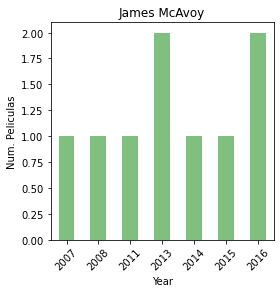

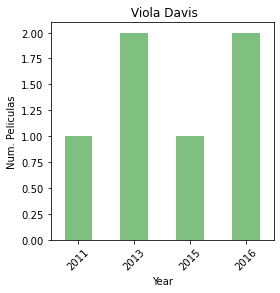

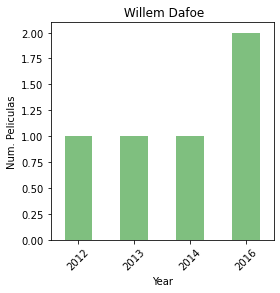

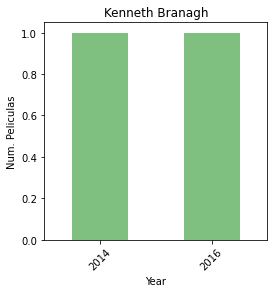

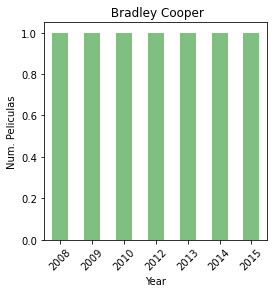

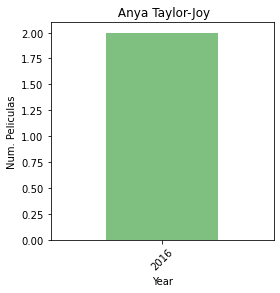

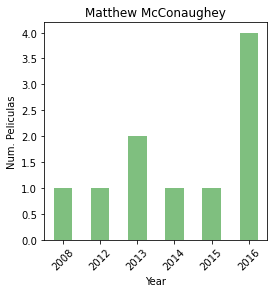

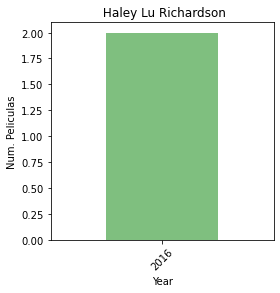

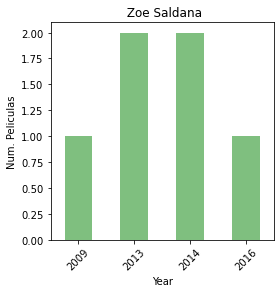

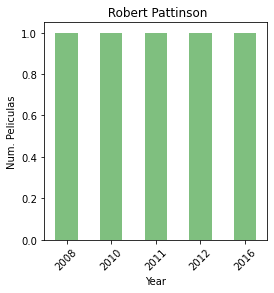

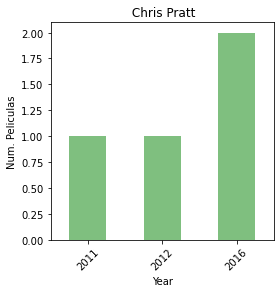

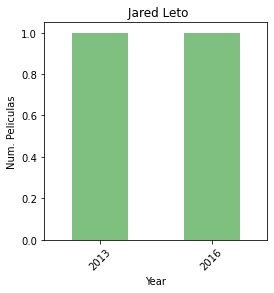

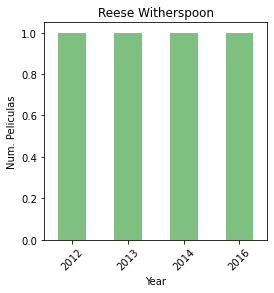

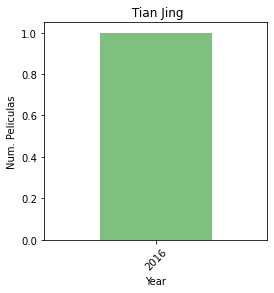

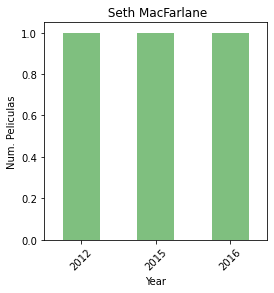

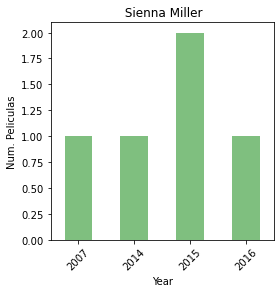

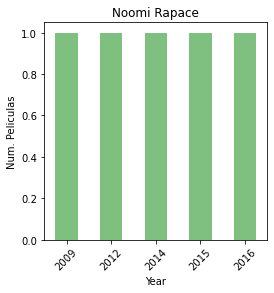

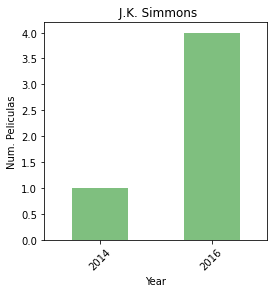

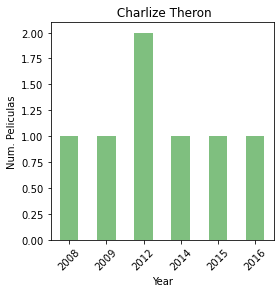

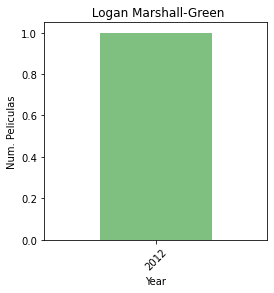

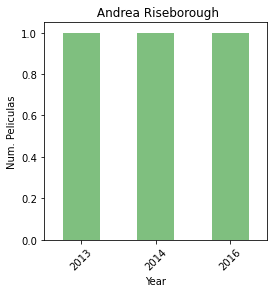

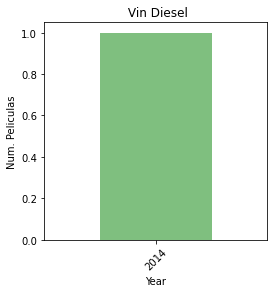

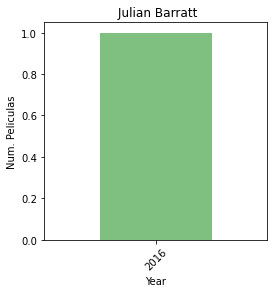

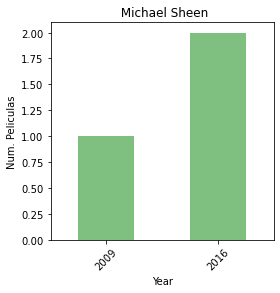

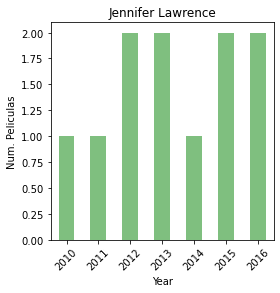

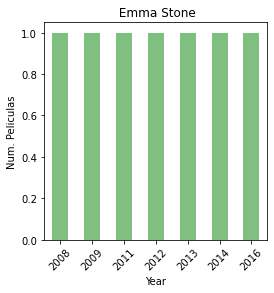

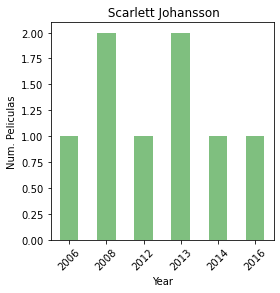

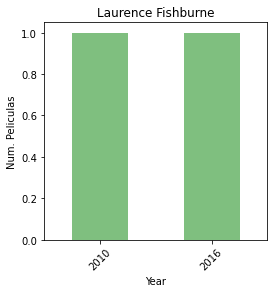

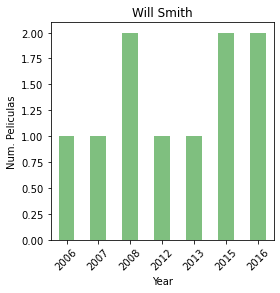

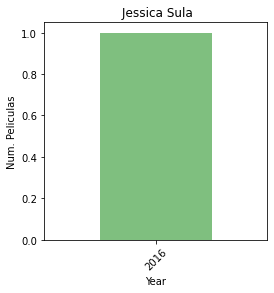

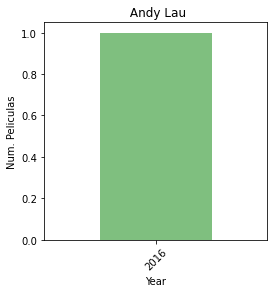

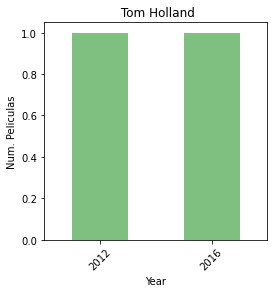

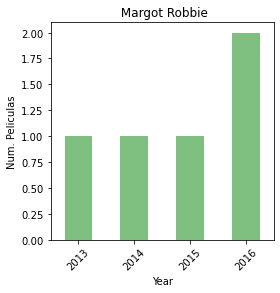

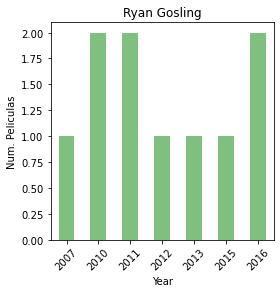

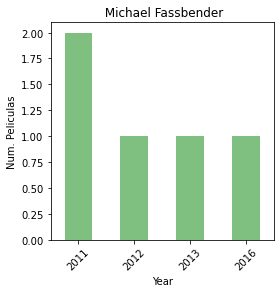

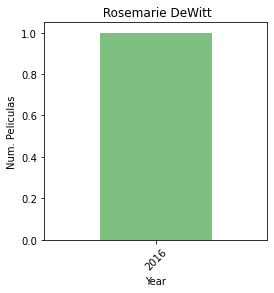

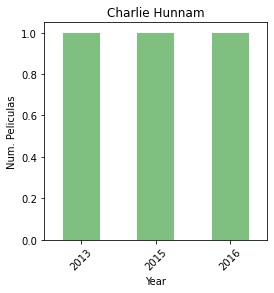

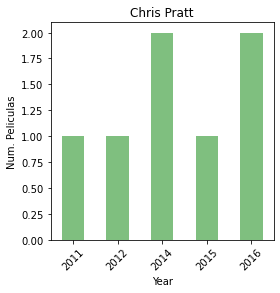

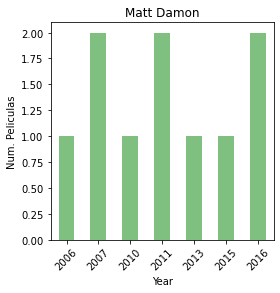

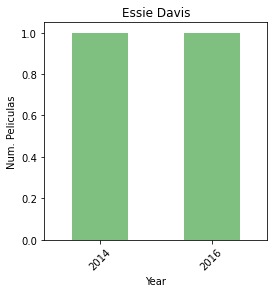

In [16]:
unique_actor = df_imdb['Actors'].unique()[:10]
solo_actor = []
for actor in unique_actor:
    solo_actor.append(actor.split(','))
solo_actor = list(itertools.chain.from_iterable(solo_actor))
solo_actor = set(solo_actor)
solo_actor
print(type(solo_actor))
for actor in solo_actor:
    actual_actor = df_imdb['Actors'].str.contains(actor).fillna(False)
    plt.figure(figsize=(4,4))
    plt.xlabel('Year')
    plt.ylabel('Num. Peliculas')
    plt.title(str(actor))
    df_imdb[actual_actor].Year.value_counts()[:10].sort_index().plot(kind='bar', color='g', alpha=0.5, rot=45)
    print(actor, len(df_imdb[actual_actor]))
    

## Peliculas por Rating


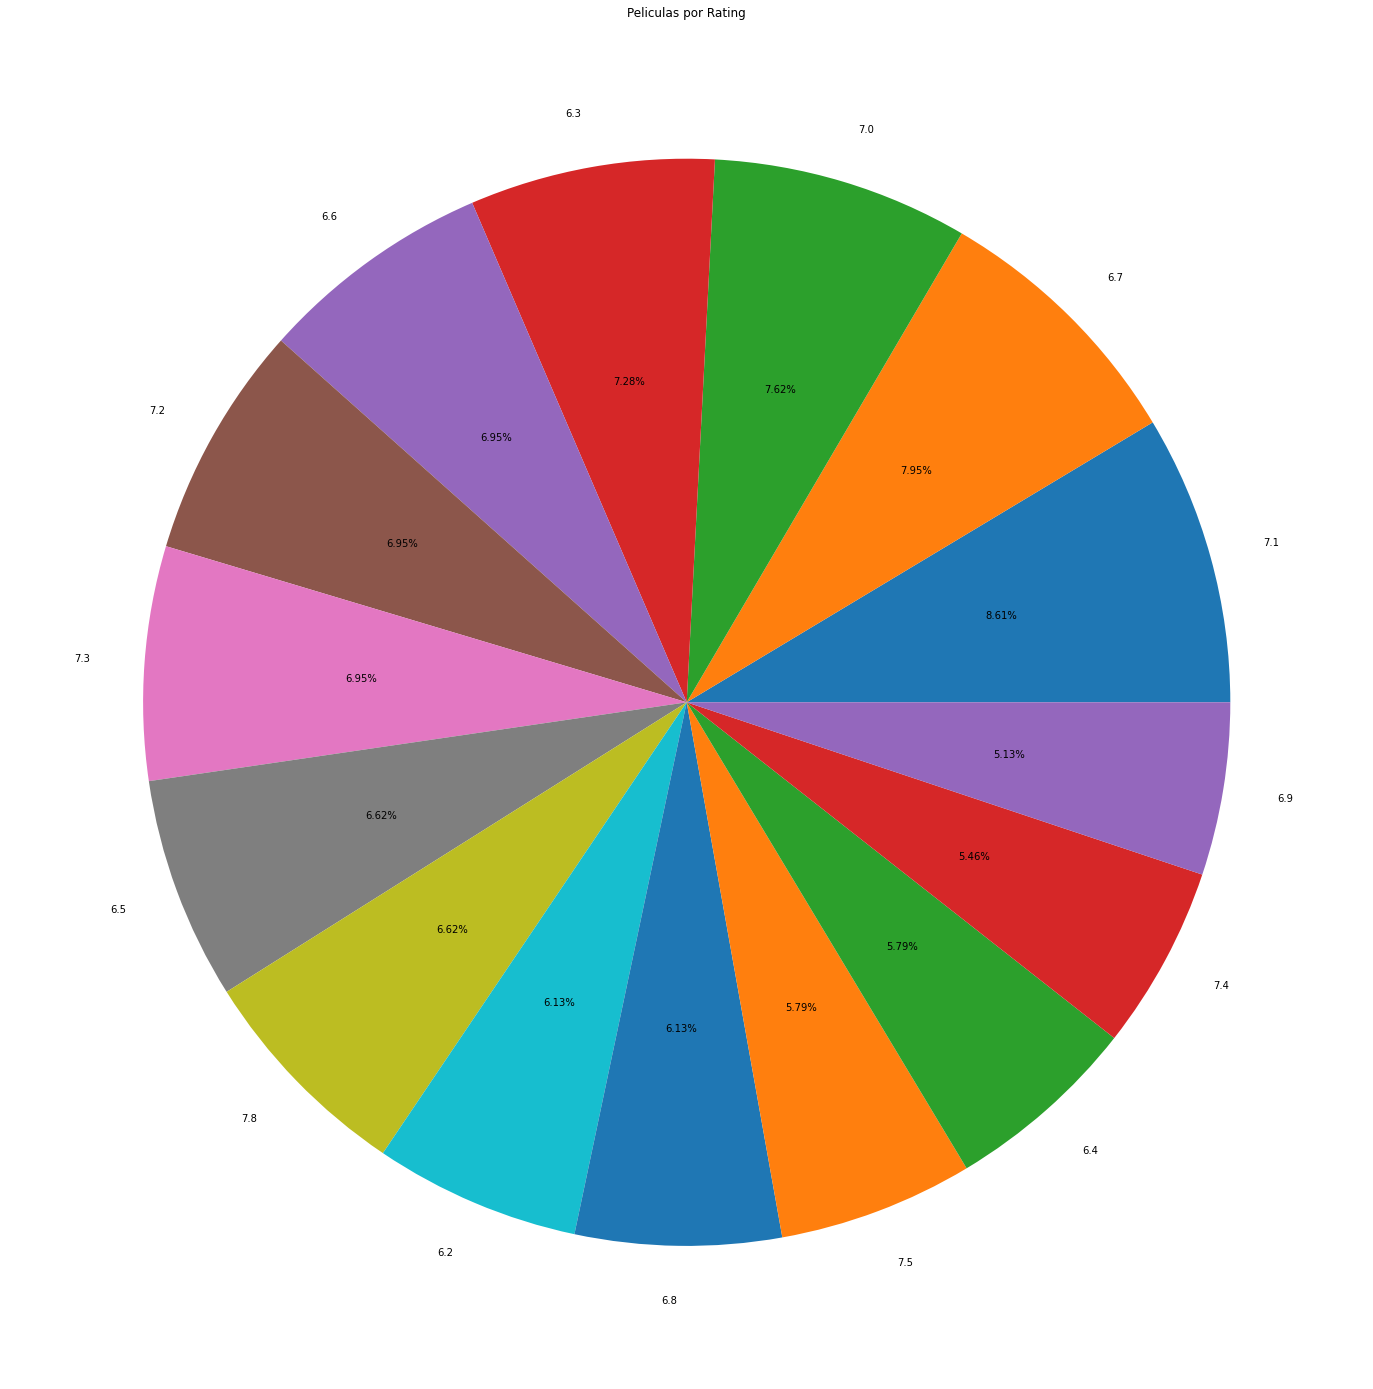

In [17]:

df_rating = df_imdb['Rating'].value_counts().head(15)
pie_3 = plt.figure(figsize=(25,25))
plt.pie(df_rating.values,labels=df_rating.index,autopct='%.2f%%')
plt.title('Peliculas por Rating')
plt.show()

## Actores apliado, uso de otro csv relacionado


In [18]:
path_csv_names = 'E:\EPN\Python\ReposPY\py-quinonez-jair\Proyectos_indivuales\Dataset_csv_Quinonez\data\IMDb_names.csv'
columnas_mombres = ['name','height','birth_year','death_year','spouses','divorces','primary_profession']
df_imdb_actores = pd.read_csv(path_csv_names,usecols=columnas_mombres)
df_imdb_actores.head(100)

,name,height,birth_year,death_year,spouses,divorces,primary_profession
0,Fred Astaire,177.0,1899.0,1987.0,2,0,"soundtrack,actor,miscellaneous"
1,Lauren Bacall,174.0,1924.0,2014.0,2,1,"actress,soundtrack"
2,Brigitte Bardot,166.0,1934.0,NaN,4,3,"actress,soundtrack,producer"
3,John Belushi,173.0,1949.0,1982.0,1,0,"actor,writer,soundtrack"
4,Ingmar Bergman,179.0,1918.0,2007.0,5,4,"writer,director,actor"
...,...,...,...,...,...,...,...
95,Jennifer Aniston,164.0,1969.0,NaN,2,1,"actress,producer,soundtrack"
96,Patricia Arquette,157.0,1968.0,NaN,2,2,"actress,director,producer"
97,Rowan Atkinson,181.0,1955.0,NaN,1,1,"actor,writer,soundtrack"
98,Dan Aykroyd,183.0,1952.0,NaN,1,0,"writer,actor,producer"


## Actores por estatura

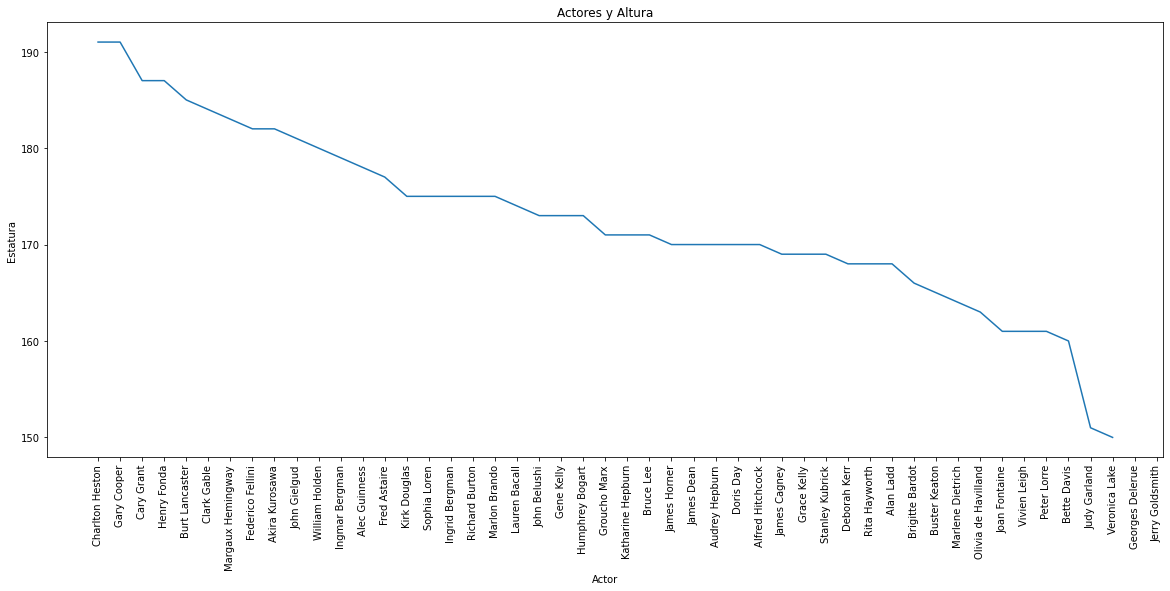

In [19]:
df_altura = df_imdb_actores[['name','height']].head(50).sort_values(by=['height'], ascending= False)
altura = pd.Series(df_altura['height'].values, index=df_altura['name'])
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(altura.index, altura.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Estatura')
plt.xlabel('Actor')
plt.title('Actores y Altura')
plt.show()

## Actores por año de nacimiento


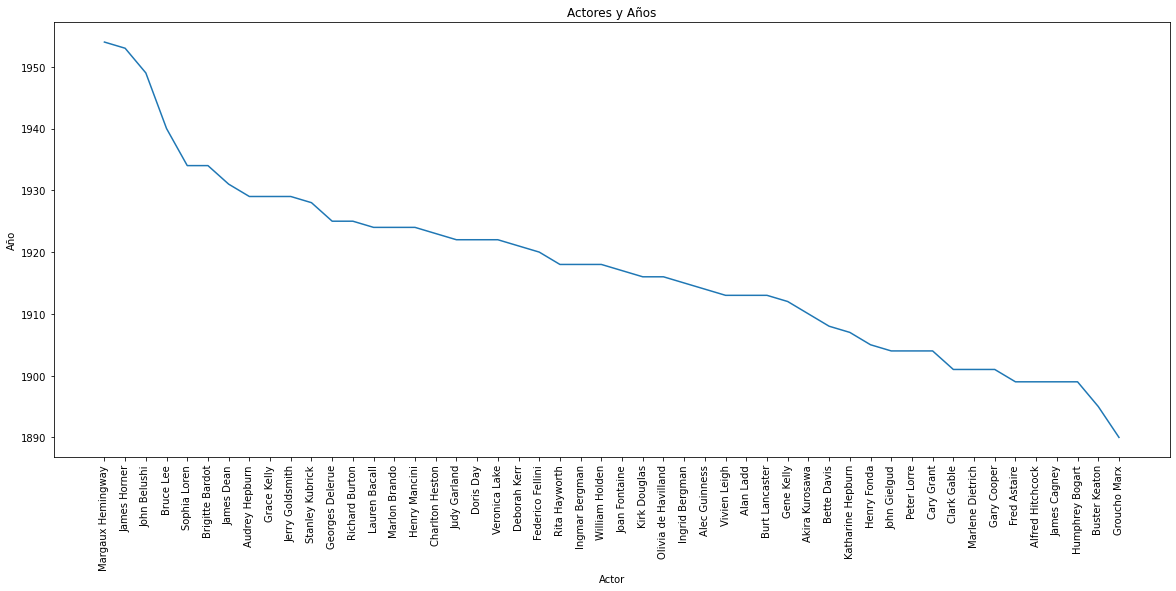

In [20]:
df_altura = df_imdb_actores[['name','birth_year']].head(50).sort_values(by=['birth_year'], ascending= False)
altura = pd.Series(df_altura['birth_year'].values, index=df_altura['name'])
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(altura.index, altura.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Año')
plt.xlabel('Actor')
plt.title('Actores y Años')
plt.show()

## Actores nacidos en mismo año


Text(0.5, 1.0, 'Actores nacidos en mismo Año 1890-1954')

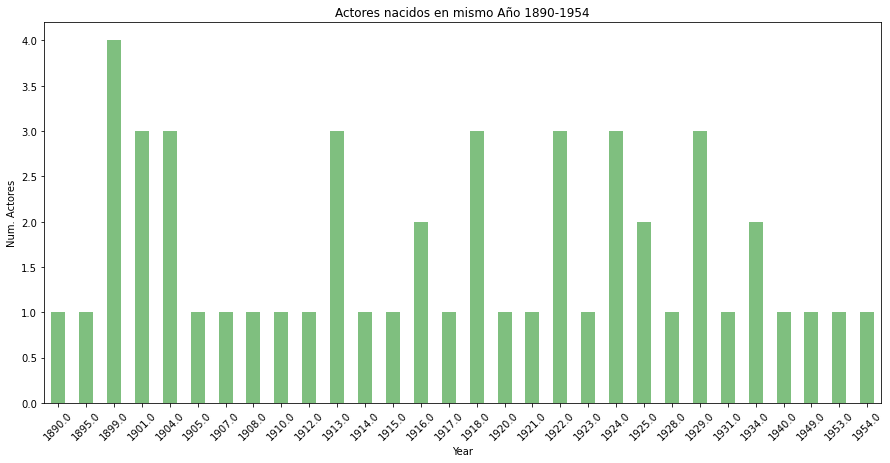

In [21]:
act_anio = df_imdb_actores['birth_year'].head(50).value_counts().sort_index().plot(kind='bar',color='g', alpha=0.5, grid=False, rot=45, figsize=(15,7))
act_anio.set_xlabel('Year')
act_anio.set_ylabel('Num. Actores')
act_anio.set_title('Actores nacidos en mismo Año 1890-1954')

## Actores por Años de muerte 

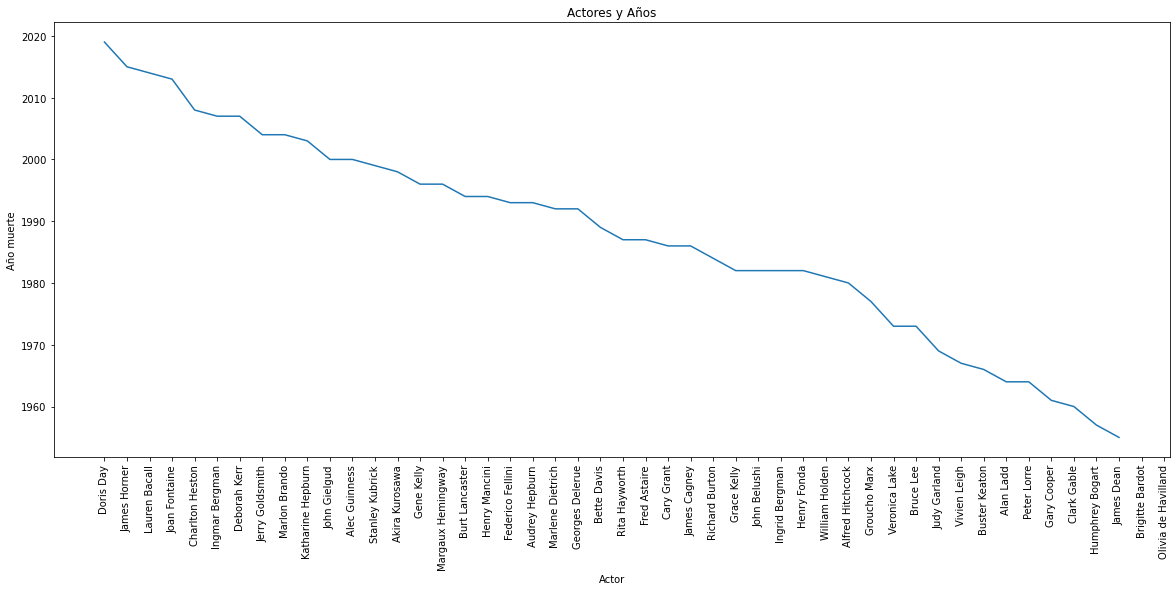

In [22]:
df_altura = df_imdb_actores[['name','death_year']].head(50).sort_values(by=['death_year'], ascending= False)
altura = pd.Series(df_altura['death_year'].values, index=df_altura['name'])
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(altura.index, altura.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Año muerte')
plt.xlabel('Actor')
plt.title('Actores y Años')
plt.show()

## Principales profeciones 


The total number of primary profesion with  director = 42228
The total number of primary profesion with  make_up_department = 508
The total number of primary profesion with  actor = 60477
The total number of primary profesion with  soundtrack = 17428
The total number of primary profesion with  writer = 56082
The total number of primary profesion with  producer = 49546
The total number of primary profesion with  miscellaneous = 15105
The total number of primary profesion with  actress = 33270


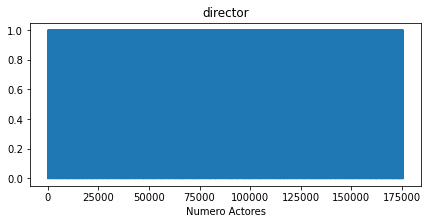

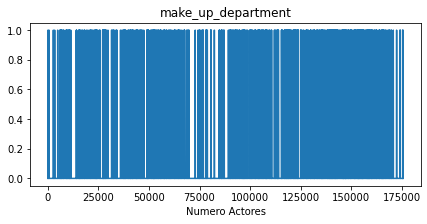

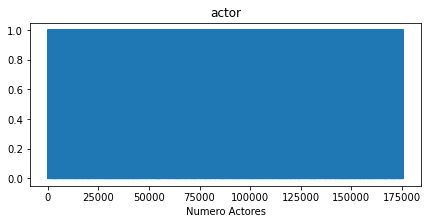

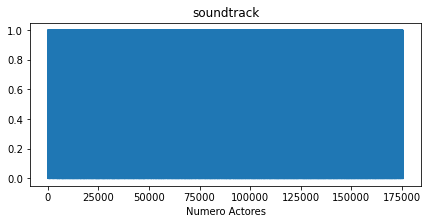

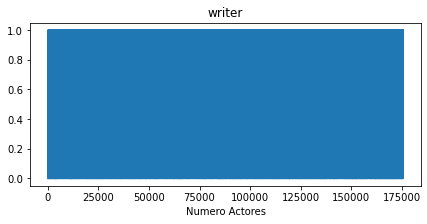

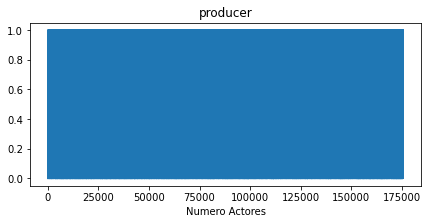

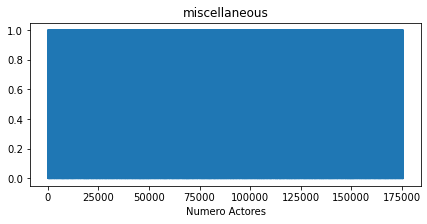

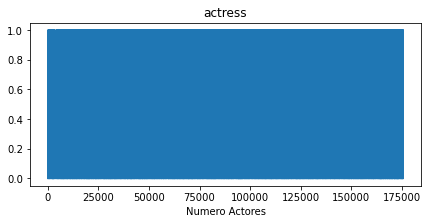

In [23]:
unique_actor = df_imdb_actores['primary_profession'].unique()[:10]
solo_profesion = []
for pro in unique_actor:
    solo_profesion.append(pro.split(','))
solo_profesion = list(itertools.chain.from_iterable(solo_profesion))
solo_profesion = set(solo_profesion)
for pro in solo_profesion:
    df_pro = df_imdb_actores['primary_profession'].str.contains(pro).fillna(False)
    print('The total number of primary profesion with ',pro,'=',len(df_imdb_actores[df_pro]))
    f, ax = plt.subplots(figsize=(7, 3))
    ax.plot(df_pro.index, df_pro.values) 
    plt.xlabel('Numero Actores')
    #sns.countplot( x=df_imdb_actores.value_counts(),data=df_imdb_actores[df_pro].head(10), palette="Blues");
    plt.title(pro)


## Actores y matrimonios 


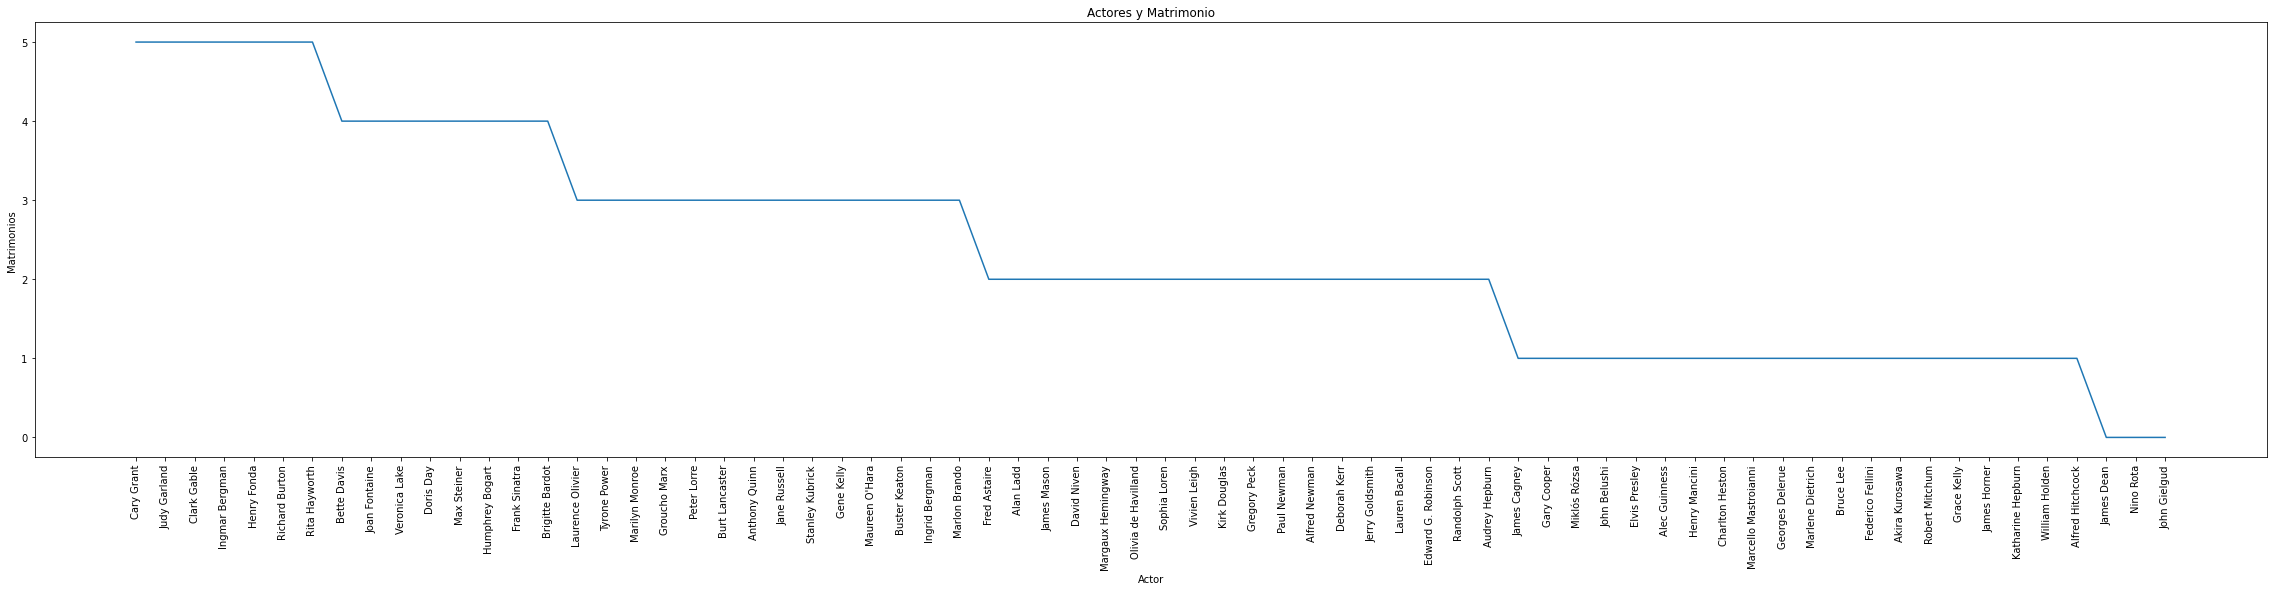

In [24]:
df_altura = df_imdb_actores[['name','spouses']].head(70).sort_values(by=['spouses'], ascending= False)
altura = pd.Series(df_altura['spouses'].values, index=df_altura['name'])
fig, ax = plt.subplots(figsize=(40,8))
ax.plot(altura.index, altura.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Matrimonios')
plt.xlabel('Actor')
plt.title('Actores y Matrimonio')
plt.show()

## Top 40 Votos por titulo


Title
(500) Days of Summer    398972
10 Cloverfield Lane     192968
10 Years                 19636
12 Years a Slave        486338
127 Hours               294010
                         ...  
Zipper                    4912
Zodiac                  329683
Zombieland              409403
Zoolander 2              48297
Zootopia                296853
Name: Votes, Length: 999, dtype: int64


<AxesSubplot:xlabel='Title'>

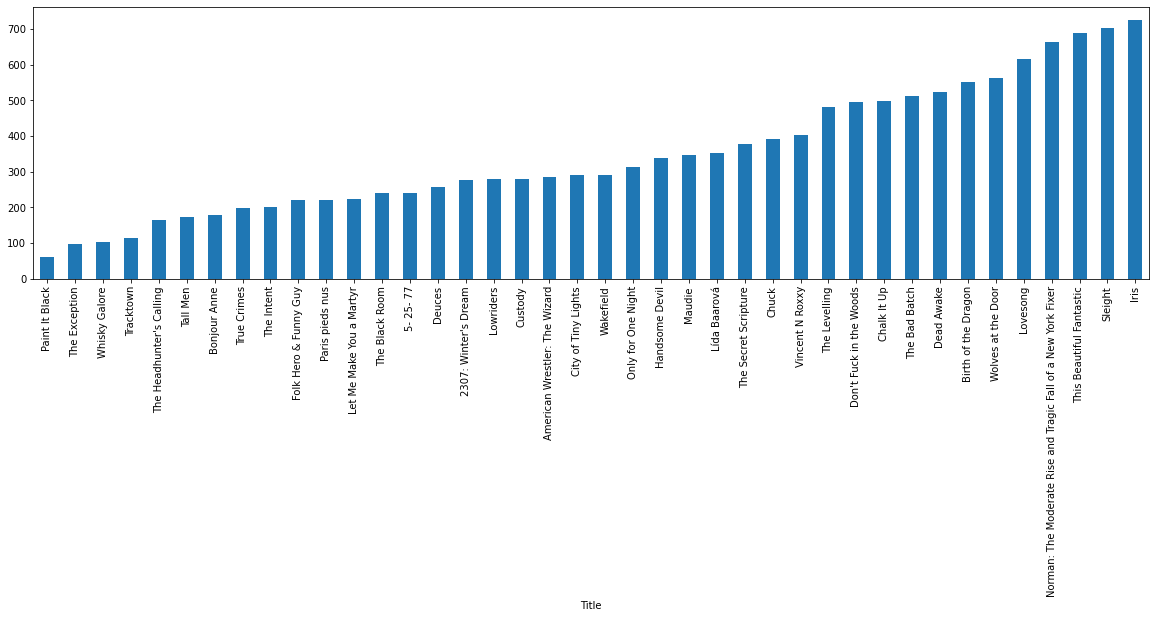

In [25]:
genero_directo = df_imdb[['Title', 'Votes']]
#print(genero_directo)
genero_dir = genero_directo.groupby('Title')['Votes'].sum()
print(genero_dir)
genero_dir = genero_dir.sort_values(axis=0, ascending=True)[:40]
genero_dir.plot(kind='bar',figsize=(20,5))

## Meta Score por director


Director
Aamir Khan              42.0
Abdellatif Kechiche     88.0
Adam Leon               77.0
Adam McKay             262.0
Adam Shankman          128.0
                       ...  
Xavier Dolan           122.0
Yimou Zhang             42.0
Yorgos Lanthimos       155.0
Zack Snyder            240.0
Zackary Adler           90.0
Name: Metascore, Length: 644, dtype: float64


<AxesSubplot:xlabel='Director'>

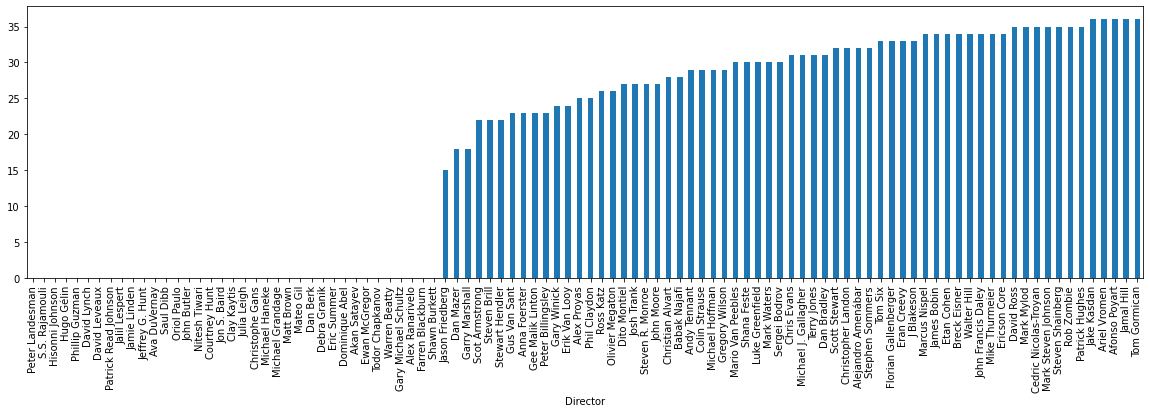

In [26]:
genero_directo = df_imdb[['Director', 'Metascore']]
#print(genero_directo)
genero_dir = genero_directo.groupby('Director')['Metascore'].sum()
print(genero_dir)
genero_dir = genero_dir.sort_values(axis=0, ascending=True)[:100]
genero_dir.plot(kind='bar',figsize=(20,5))